In [26]:
%matplotlib inline  
from matplotlib import pyplot as plt

from tensorflow.keras.datasets import imdb  # 数据集
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN,Flatten,Dropout #Embedding 词嵌入层 SimpleRNN基础版RNN层
from tensorflow.keras.preprocessing import sequence   # 序列处理
from tensorflow.keras.optimizers import RMSprop #优化器
import numpy as np

In [27]:
# imdb数据加载
# num_words: 需要保留的最大词数，基于词频。只有最常出现的 num_words 词会被保留。这里取常用词汇5000个，来组合成句子。
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000,  seed=528)

# 查看数据规格
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,) (25000,) (25000,)


C:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [47]:
# 由于每条评论数据长度不一致，需要将每个序列调整为相同的长度
# pad_sequences，将多个序列截断或补齐为相同长度，短于maxlen的默认是前端补齐0， 超过maxlen的，默认是丢弃前面的
x_train_sq = sequence.pad_sequences(x_train, maxlen=500, padding='pre', truncating='pre')
print(x_train_sq.shape)
#print(x_train_sq[5])
#print(x_train[5])

x_test_sq = sequence.pad_sequences(x_test, maxlen=500, padding='pre', truncating='pre')
print(x_test_sq.shape)
#print(x_test_sq)

(25000, 500)
(25000, 500)


In [97]:
from tensorflow.keras import regularizers

model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=32,input_length=500))
model.add(Flatten())
model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = "adam",
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_29 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                512032    
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 33        
Total params: 832,065
Trainable params: 832,065
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Fit the model
hs=model.fit(x_train_sq, y_train, 
          validation_data=(x_test_sq, y_test), 
          epochs=3, 
          batch_size=32, 
          verbose=1)

Epoch 1/3
782/782 [==============================] - 11s 13ms/step - loss: 0.6283 - accuracy: 0.6357 - val_loss: 0.3767 - val_accuracy: 0.8742
Epoch 2/3
782/782 [==============================] - 10s 12ms/step - loss: 0.2868 - accuracy: 0.9262 - val_loss: 0.4021 - val_accuracy: 0.8705
Epoch 3/3
782/782 [==============================] - 10s 12ms/step - loss: 0.1847 - accuracy: 0.9726 - val_loss: 0.4464 - val_accuracy: 0.8623


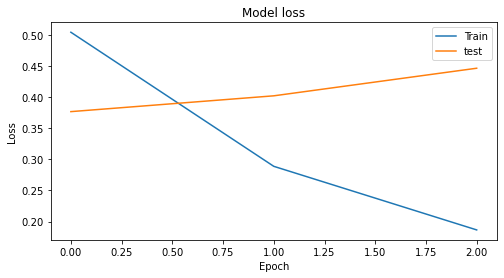

In [99]:
def plot_loss(hs):
    plt.figure(figsize = (8,4))
    plt.plot(hs.history['loss'], label = 'Train')  
    plt.plot(hs.history['val_loss'],label = 'test')  
    plt.title('Model loss')  
    plt.ylabel('Loss')  
    plt.xlabel('Epoch')  
    plt.legend(loc=0)  # loc=0 表示最优位置，自动。也可以手动设置，如：'upper left'等
    plt.show()
    return
plot_loss(hs)

# 总结 

In [96]:
#过拟合降不下来